In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Car details v3.csv')

In [3]:
#head data
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
#tail of the data
data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [5]:
#shape of the data
data.shape

(8128, 13)

# PREPROCESSING

### Handle null values

In [6]:
#finding the null values
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

<AxesSubplot:>

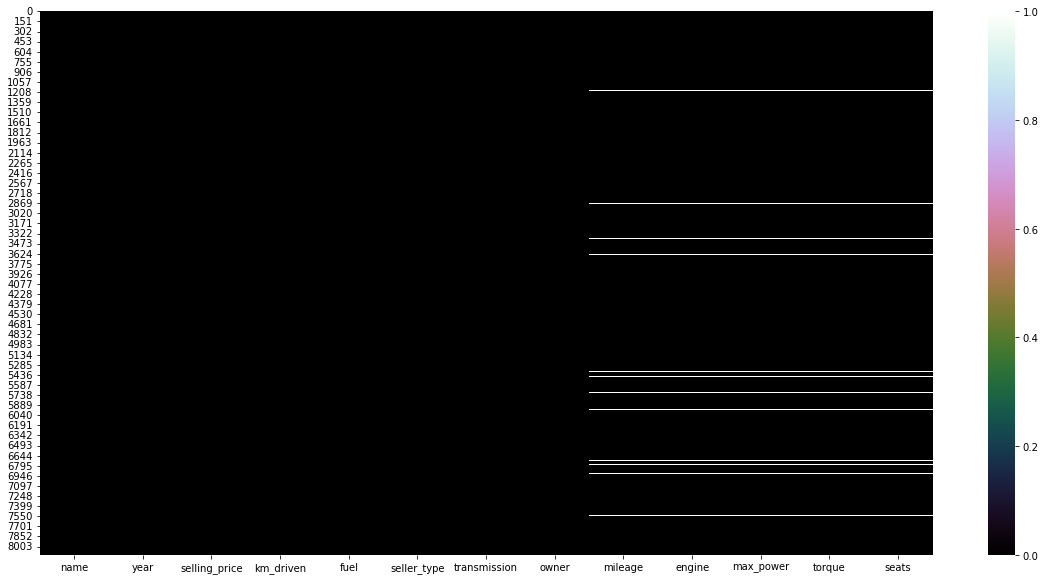

In [7]:
sd=data.isnull()
plt.figure(figsize=(20,10))
sns.heatmap(sd,cmap='cubehelix')

**we can see that there are null values in mileage,engine,max_power,torque,seats, so we need to handle those null values**

In [8]:
#split the data 
data[['mileage_', 'mil_unit']] = data['mileage'].str.split(' ', 1, expand=True)
data.drop(['mil_unit', 'mileage'],axis=1,inplace=True)
data['mileage_']=data['mileage_'].astype('float')
#fill the missing values
data['mileage_']=data['mileage_'].fillna(data['mileage_'].mean())

In [9]:
#split the data 
data[['engine_','engine_unit']] = data['engine'].str.split(' ', 1, expand=True)
data.drop(['engine_unit', 'engine'],axis=1,inplace=True)
data['engine_']=data['engine_'].astype('float')
#fill the missing values with mean
data['engine_']=data['engine_'].fillna(data['engine_'].mean())

In [10]:
#fill null values with mode
data[['max_power_number', 'max_power_unit']] = data['max_power'].str.split(' ', 1, expand=True)
data.drop(['max_power_unit', 'max_power'],axis=1,inplace=True)

data['max_power_number'].replace({'': 0}, inplace=True)

data['max_power_number'] = data['max_power_number'].fillna(data['max_power_number'].mode()[0])

data['max_power_number']=data['max_power_number'].astype('float')

In [11]:
#torque feature
data[['torque', 'torque_remainder']] = data['torque'].str.split('@', 1, expand=True)
data.drop(['torque_remainder'],axis=1,inplace=True)
data['torque']= data['torque'].str.extract('(^\d*)')
data['torque']= data['torque'].fillna(150)
data['torque']=data['torque'].astype('int')
#kgm convert to Nm
data['torque'] = data['torque'].apply(lambda x: 9.8*x if x <= 50 else x)

In [12]:
#fill null values with mean
data['seats']=data['seats'].fillna(data['seats'].mean())

In [13]:
#dropping name feature
data.drop(['name'], axis=1, inplace=True)

In [14]:
#Get categorical and numerical columns
categorical_cols=[cname for cname in data.columns if data[cname].dtypes=='object']
numerical_cols=[cname for cname in data.columns if data[cname].dtypes!='object']
print('Categorical features:',categorical_cols,'\n')
print('Numerical features:',numerical_cols)

Categorical features: ['fuel', 'seller_type', 'transmission', 'owner'] 

Numerical features: ['year', 'selling_price', 'km_driven', 'torque', 'seats', 'mileage_', 'engine_', 'max_power_number']


<AxesSubplot:>

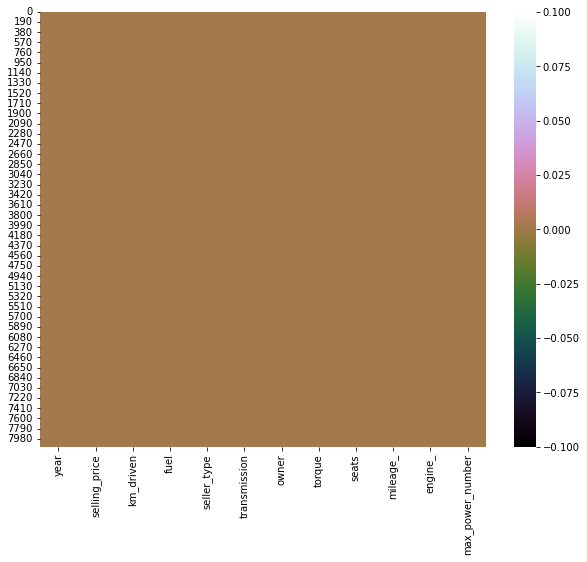

In [15]:
sd=data.isnull()
plt.figure(figsize=(10,8))
sns.heatmap(sd,cmap='cubehelix')

**Hence the null values has been removed**

In [16]:
data.shape

(8128, 12)

### Handle the outliers

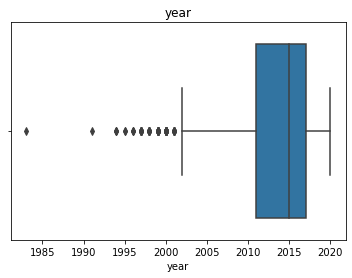

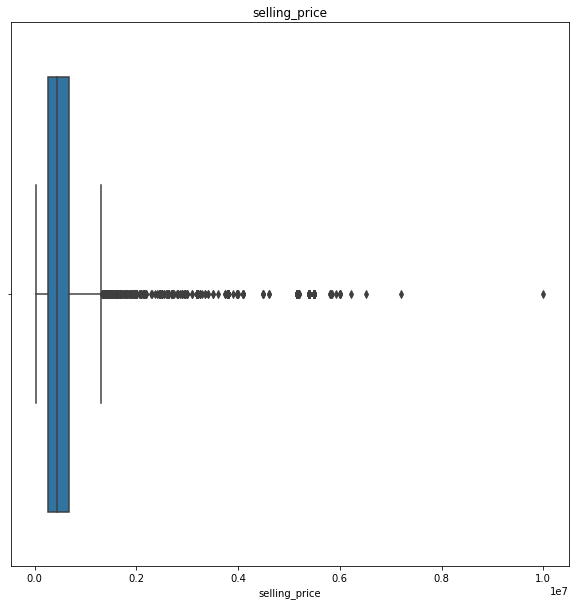

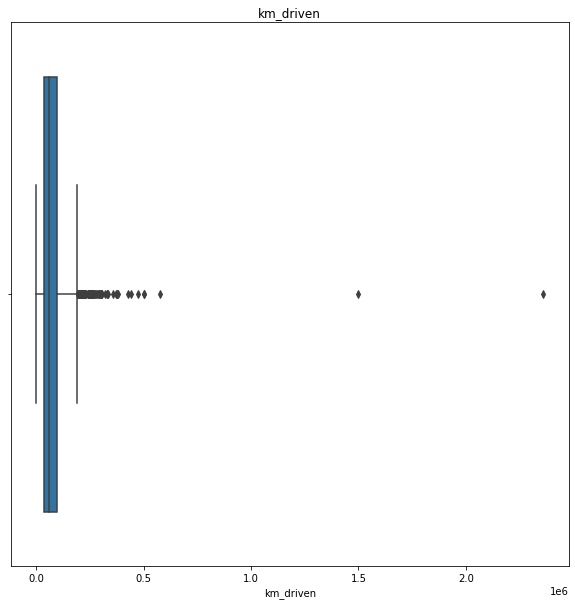

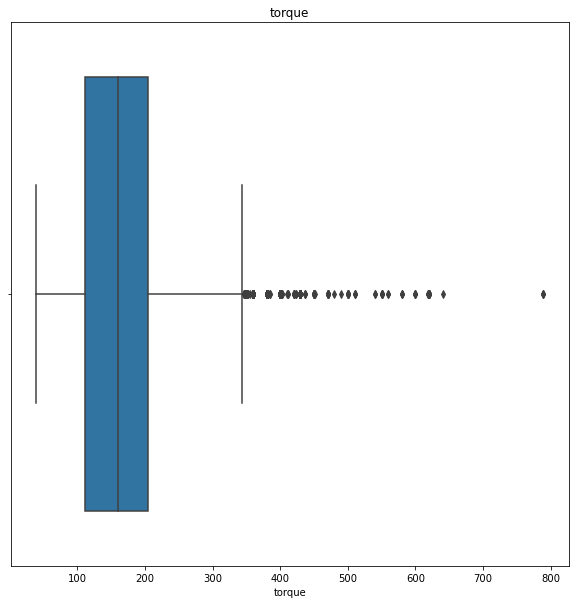

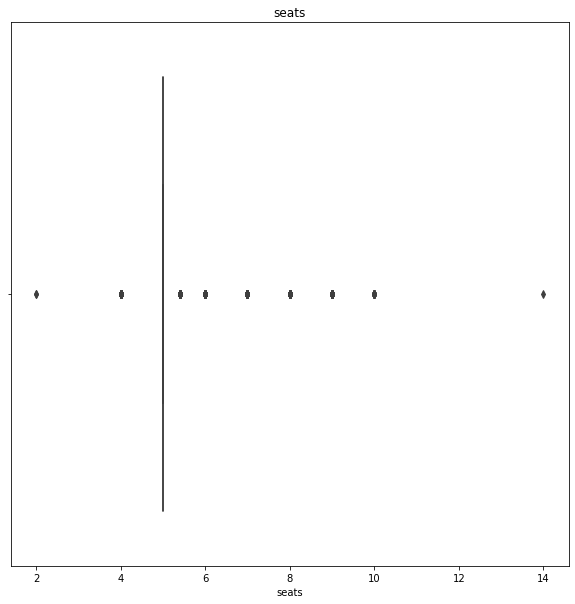

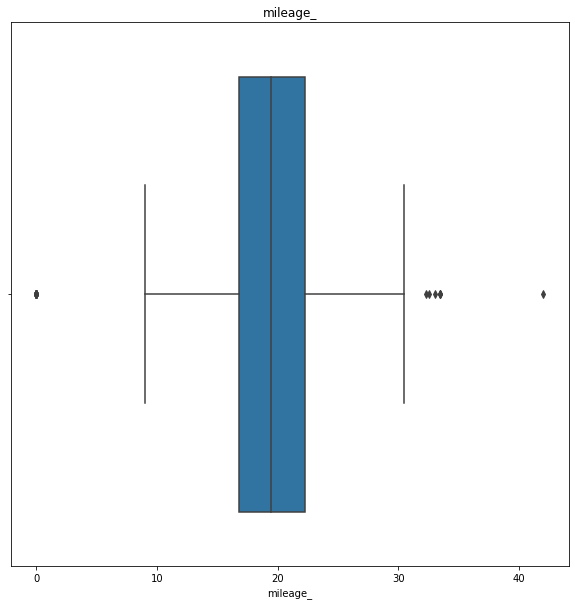

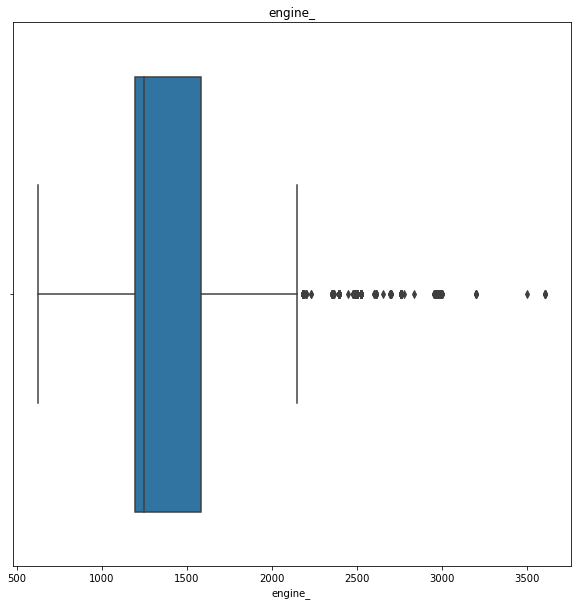

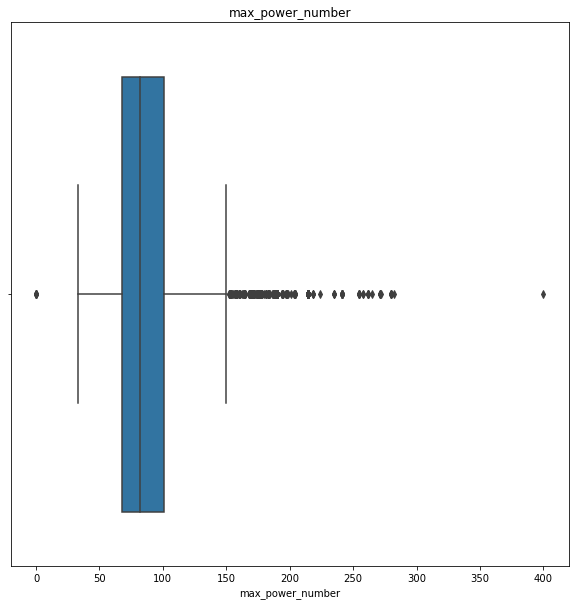

<Figure size 720x720 with 0 Axes>

In [17]:
for feature in numerical_cols:
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(10,10))

we can see that there are outliers so we will handle them

In [18]:
#Handling outliers in year
IQR=data.year.quantile(0.75)-data.year.quantile(0.25)
lower_limit=data.year.quantile(0.25)-(IQR*1.5)
upper_limit=data.year.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

2002.0 2026.0


In [19]:
data["year"] = np.where(data["year"] <2002.0, 2002.0,data['year'])
data["year"] = np.where(data["year"] >2026.0, 2026.0,data['year'])

In [20]:
#handle outlier in selling price
IQR=data.selling_price.quantile(0.75)-data.selling_price.quantile(0.25)
lower_limit=data.selling_price.quantile(0.25)-(IQR*1.5)
upper_limit=data.selling_price.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

-375002.5 1305001.5


In [21]:
data["selling_price"] = np.where(data["selling_price"] <-375002.5, -375002.5,data['selling_price'])
data["selling_price"] = np.where(data["selling_price"] >1305001.5, 1305001.5,data['selling_price'])

In [22]:
#Handling outliers in 'km_driven'
IQR=data.km_driven.quantile(0.75)-data.km_driven.quantile(0.25)
lower_limit=data.km_driven.quantile(0.25)-(IQR*1.5)
upper_limit=data.km_driven.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

-59500.0 192500.0


In [23]:
data.loc[data['km_driven']<=-59500.0,'km_driven']=-59500.0
data.loc[data['km_driven']>=192500.0,'km_driven']=192500.0

In [24]:
#Handling outliers in 'torque'
IQR=data.torque.quantile(0.75)-data.torque.quantile(0.25)
lower_limit=data.torque.quantile(0.25)-(IQR*1.5)
upper_limit=data.torque.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

-27.5 344.5


In [25]:
data.loc[data['torque']<=-27.5,'torque']=-27.5
data.loc[data['torque']>=344.5,'torque']=344.5

In [26]:
#Handling outliers in 'mileage_'
IQR=data.mileage_.quantile(0.75)-data.mileage_.quantile(0.25)
lower_limit=data.mileage_.quantile(0.25)-(IQR*1.5)
upper_limit=data.mileage_.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

8.583750000000002 30.49375


In [27]:
data.loc[data['mileage_']<=8.58,'mileage_']=8.58
data.loc[data['mileage_']>=30.49,'mileage_']=30.49

In [28]:
#Handling outliers in 'engine_'
IQR=data.engine_.quantile(0.75)-data.engine_.quantile(0.25)
lower_limit=data.engine_.quantile(0.25)-(IQR*1.5)
upper_limit=data.engine_.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

619.5 2159.5


In [29]:
data.loc[data['engine_']<=619.5,'engine_']=619.5
data.loc[data['engine_']>=2159.5,'engine_']=2159.5

In [30]:
#Handling outliers in 'max_power_number'
IQR=data.max_power_number.quantile(0.75)-data.max_power_number.quantile(0.25)
lower_limit=data.max_power_number.quantile(0.25)-(IQR*1.5)
upper_limit=data.max_power_number.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

18.374999999999986 150.97500000000002


In [31]:
data.loc[data['max_power_number']<=18.37,'max_power_number']=18.37
data.loc[data['max_power_number']>=150.97,'max_power_number']=150.97

### Encoding

In [32]:
categorical_cols=[cname for cname in data.columns if data[cname].dtypes=='object']
print(categorical_cols)

['fuel', 'seller_type', 'transmission', 'owner']


In [33]:
#one hot encoding
data1=data.copy(deep=True)
data_encoded = pd.get_dummies(data[categorical_cols],drop_first=True)
data1.drop(categorical_cols,axis=1,inplace=True)
data1 = pd.concat([data,data_encoded],axis=1)

data1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage_,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014.0,450000.0,145500,Diesel,Individual,Manual,First Owner,190.0,5.0,23.40,...,1,0,0,1,0,1,0,0,0,0
1,2014.0,370000.0,120000,Diesel,Individual,Manual,Second Owner,250.0,5.0,21.14,...,1,0,0,1,0,1,0,1,0,0
2,2006.0,158000.0,140000,Petrol,Individual,Manual,Third Owner,117.6,5.0,17.70,...,0,0,1,1,0,1,0,0,0,1
3,2010.0,225000.0,127000,Diesel,Individual,Manual,First Owner,215.6,5.0,23.00,...,1,0,0,1,0,1,0,0,0,0
4,2007.0,130000.0,120000,Petrol,Individual,Manual,First Owner,107.8,5.0,16.10,...,0,0,1,1,0,1,0,0,0,0


In [34]:
data1['fuel']

0       Diesel
1       Diesel
2       Petrol
3       Diesel
4       Petrol
         ...  
8123    Petrol
8124    Diesel
8125    Diesel
8126    Diesel
8127    Diesel
Name: fuel, Length: 8128, dtype: object

In [35]:
data1=data1.drop(['fuel','seller_type','transmission','owner'],axis=1)

### feature reduction

In [36]:
corrmatt = data1.corr(method = "spearman")

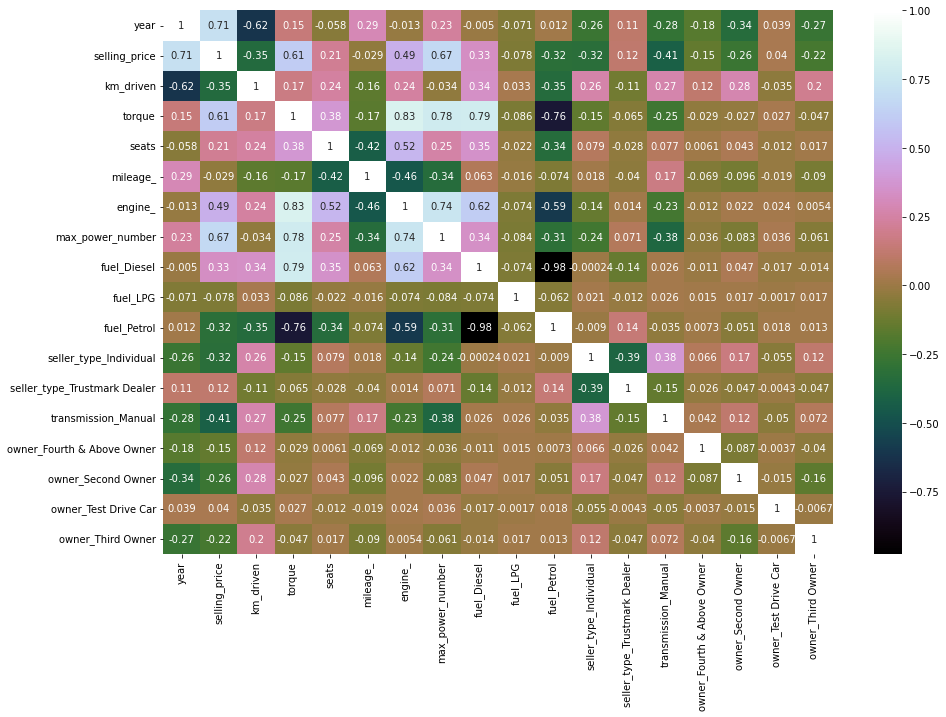

In [37]:
#plot heat map
plt.figure(figsize=(15,10))
g=sns.heatmap(corrmatt,annot=True,cmap='cubehelix')

In [38]:
#finding the higher correlation value
upper = corrmatt.where(np.triu(np.ones(corrmatt.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
data1.drop(to_drop, axis=1, inplace=True)

In [39]:
data1

,year,selling_price,km_driven,torque,seats,mileage_,engine_,max_power_number,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014.0,450000.0,145500,190.0,5.0,23.40,1248.0,74.00,1,0,0,1,0,1,0,0,0,0
1,2014.0,370000.0,120000,250.0,5.0,21.14,1498.0,103.52,1,0,0,1,0,1,0,1,0,0
2,2006.0,158000.0,140000,117.6,5.0,17.70,1497.0,78.00,0,0,1,1,0,1,0,0,0,1
3,2010.0,225000.0,127000,215.6,5.0,23.00,1396.0,90.00,1,0,0,1,0,1,0,0,0,0
4,2007.0,130000.0,120000,107.8,5.0,16.10,1298.0,88.20,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013.0,320000.0,110000,113.0,5.0,18.50,1197.0,82.85,0,0,1,1,0,1,0,0,0,0
8124,2007.0,135000.0,119000,235.2,5.0,16.80,1493.0,110.00,1,0,0,1,0,1,1,0,0,0
8125,2009.0,382000.0,120000,190.0,5.0,19.30,1248.0,73.90,1,0,0,1,0,1,0,0,0,0
8126,2013.0,290000.0,25000,140.0,5.0,23.57,1396.0,70.00,1,0,0,1,0,1,0,0,0,0


In [40]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          8128 non-null   float64
 1   selling_price                 8128 non-null   float64
 2   km_driven                     8128 non-null   int64  
 3   torque                        8128 non-null   float64
 4   seats                         8128 non-null   float64
 5   mileage_                      8128 non-null   float64
 6   engine_                       8128 non-null   float64
 7   max_power_number              8128 non-null   float64
 8   fuel_Diesel                   8128 non-null   uint8  
 9   fuel_LPG                      8128 non-null   uint8  
 10  fuel_Petrol                   8128 non-null   uint8  
 11  seller_type_Individual        8128 non-null   uint8  
 12  seller_type_Trustmark Dealer  8128 non-null   uint8  
 13  tra

### standardisation

In [41]:
#from sklearn import preprocessing
#standardisation=preprocessing.StandardScaler()
#data2=standardisation.fit_transform(data1)

### Feature Engineering

In [42]:
data2=data

In [43]:
data1

,year,selling_price,km_driven,torque,seats,mileage_,engine_,max_power_number,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014.0,450000.0,145500,190.0,5.0,23.40,1248.0,74.00,1,0,0,1,0,1,0,0,0,0
1,2014.0,370000.0,120000,250.0,5.0,21.14,1498.0,103.52,1,0,0,1,0,1,0,1,0,0
2,2006.0,158000.0,140000,117.6,5.0,17.70,1497.0,78.00,0,0,1,1,0,1,0,0,0,1
3,2010.0,225000.0,127000,215.6,5.0,23.00,1396.0,90.00,1,0,0,1,0,1,0,0,0,0
4,2007.0,130000.0,120000,107.8,5.0,16.10,1298.0,88.20,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013.0,320000.0,110000,113.0,5.0,18.50,1197.0,82.85,0,0,1,1,0,1,0,0,0,0
8124,2007.0,135000.0,119000,235.2,5.0,16.80,1493.0,110.00,1,0,0,1,0,1,1,0,0,0
8125,2009.0,382000.0,120000,190.0,5.0,19.30,1248.0,73.90,1,0,0,1,0,1,0,0,0,0
8126,2013.0,290000.0,25000,140.0,5.0,23.57,1396.0,70.00,1,0,0,1,0,1,0,0,0,0


In [44]:
#Create a feature named 'Car_age' which is current_year-'year'

from datetime import date
todays_date = date.today()
print("Current year:", todays_date.year)

data2['Car_age']=todays_date.year-data2['year']

data2.drop('year', axis=1, inplace=True)

Current year: 2022


In [45]:
data

,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage_,engine_,max_power_number,Car_age
0,450000.0,145500,Diesel,Individual,Manual,First Owner,190.0,5.0,23.40,1248.0,74.00,8.0
1,370000.0,120000,Diesel,Individual,Manual,Second Owner,250.0,5.0,21.14,1498.0,103.52,8.0
2,158000.0,140000,Petrol,Individual,Manual,Third Owner,117.6,5.0,17.70,1497.0,78.00,16.0
3,225000.0,127000,Diesel,Individual,Manual,First Owner,215.6,5.0,23.00,1396.0,90.00,12.0
4,130000.0,120000,Petrol,Individual,Manual,First Owner,107.8,5.0,16.10,1298.0,88.20,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000.0,110000,Petrol,Individual,Manual,First Owner,113.0,5.0,18.50,1197.0,82.85,9.0
8124,135000.0,119000,Diesel,Individual,Manual,Fourth & Above Owner,235.2,5.0,16.80,1493.0,110.00,15.0
8125,382000.0,120000,Diesel,Individual,Manual,First Owner,190.0,5.0,19.30,1248.0,73.90,13.0
8126,290000.0,25000,Diesel,Individual,Manual,First Owner,140.0,5.0,23.57,1396.0,70.00,9.0


# EDA

In [46]:
#Get categorical and numerical columns
categorical_cols=[cname for cname in data.columns if data[cname].dtypes=='object']
numerical_cols=[cname for cname in data.columns if data[cname].dtypes!='object']
print('Categorical features:',categorical_cols,'\n')
print('Numerical features:',numerical_cols)

Categorical features: ['fuel', 'seller_type', 'transmission', 'owner'] 

Numerical features: ['selling_price', 'km_driven', 'torque', 'seats', 'mileage_', 'engine_', 'max_power_number', 'Car_age']


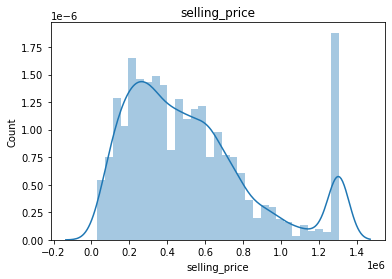

<Figure size 1080x1080 with 0 Axes>

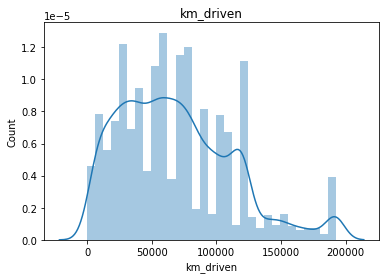

<Figure size 1080x1080 with 0 Axes>

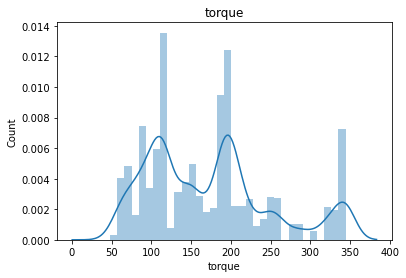

<Figure size 1080x1080 with 0 Axes>

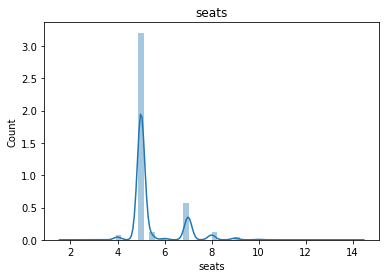

<Figure size 1080x1080 with 0 Axes>

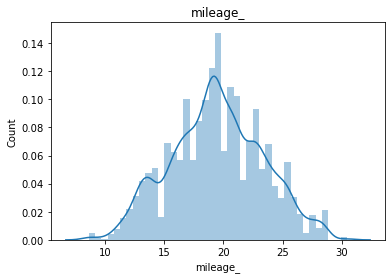

<Figure size 1080x1080 with 0 Axes>

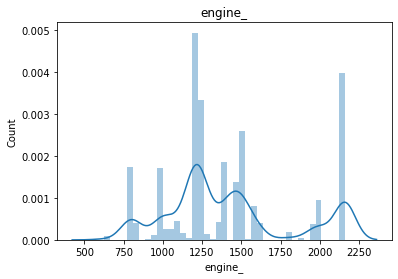

<Figure size 1080x1080 with 0 Axes>

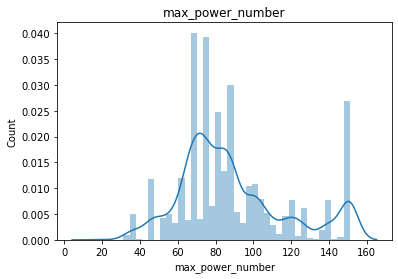

<Figure size 1080x1080 with 0 Axes>

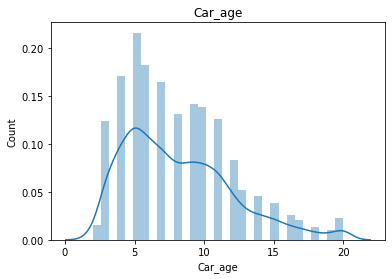

<Figure size 1080x1080 with 0 Axes>

In [47]:
#Numeric data distribution
for feature in numerical_cols:
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

Text(0.5, 1.0, 'Distribution fuel type')

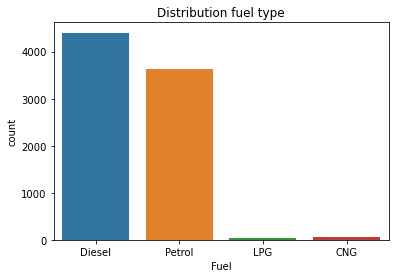

In [48]:
#Distribution fuel type
sns.countplot(x='fuel', data=data)
plt.xlabel('Fuel')
plt.title('Distribution fuel type')

most of the vehicles are diesel vehicles

Text(0.5, 1.0, 'Engine Transmission')

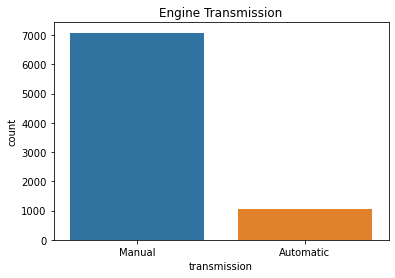

In [49]:
#Engine Transmission
sns.countplot(x='transmission', data=data)
plt.title('Engine Transmission')

Majority of the vehicles are Manual vehicles

Text(0.5, 1.0, 'Transmission-fuel')

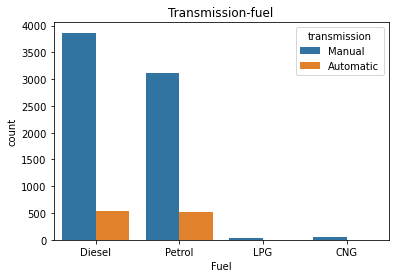

In [50]:
#Transmission-fuel
sns.countplot(x='fuel', data=data, hue='transmission')
plt.xlabel('Fuel')
plt.title('Transmission-fuel')

Text(0.5, 1.0, 'Owner')

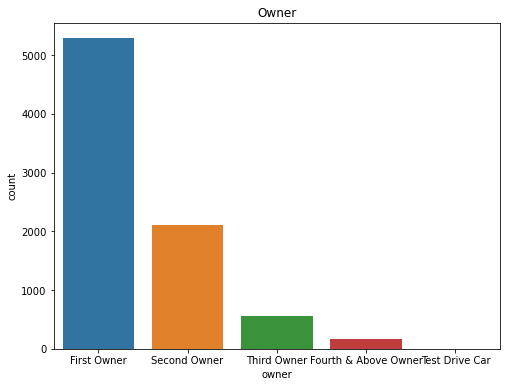

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(x='owner', data=data)
plt.title('Owner')

Majority of the vehicles are new ones

<AxesSubplot:xlabel='fuel', ylabel='mileage_'>

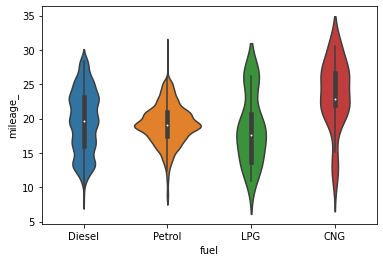

In [52]:
sns.violinplot(x='fuel',y='mileage_',data=data)

# Model Building

In [53]:
X = data1.loc[:, data1.columns!='selling_price']
y = data1['selling_price']

In [54]:
# Break off validation set from training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)


Train (5689, 17) (5689,)
Test (2439, 17) (2439,)


In [55]:
X_train

,year,km_driven,torque,seats,mileage_,engine_,max_power_number,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
6783,2006.0,120000,62.0,5.0,19.70,796.0,46.30,0,0,1,1,0,1,0,0,0,1
1073,2018.0,100000,344.5,7.0,12.90,2159.5,150.97,1,0,0,0,0,0,0,0,0,0
7756,2017.0,39000,344.5,5.0,19.59,1995.0,150.97,1,0,0,0,0,0,0,0,0,0
144,2013.0,39000,173.0,5.0,14.28,1798.0,138.03,0,0,1,0,0,0,0,0,0,0
6424,2013.0,70000,190.0,5.0,23.40,1248.0,74.00,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,2009.0,120000,290.0,7.0,12.05,2159.5,120.00,1,0,0,1,0,1,0,0,0,0
5390,2014.0,80000,190.0,5.0,23.40,1248.0,74.00,1,0,0,1,0,1,0,1,0,0
860,2016.0,35000,114.0,5.0,18.60,1197.0,81.83,0,0,1,1,0,1,0,0,0,0
7603,2019.0,27000,190.0,5.0,28.40,1248.0,74.02,1,0,0,1,0,1,0,0,0,0


In [61]:
y_train

4446     850000.0
2154     975000.0
1344     360000.0
7856     725000.0
6107    1200000.0
          ...    
5226     475000.0
5390     530000.0
860      576000.0
7603     770000.0
7270     155000.0
Name: selling_price, Length: 5445, dtype: float64

In [57]:
# Min Max scalar
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(X)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,0.657754,0.354861,0.436359,0.284727,0.495365,0.516187,0.529666,0.541585,0.004675,0.446727,0.832431,0.029035,0.870817,0.021407,0.258981,0.000615,0.068282
std,0.217458,0.226334,0.257275,0.078871,0.178049,0.264511,0.215793,0.498298,0.068220,0.497185,0.373506,0.167916,0.335423,0.144747,0.438102,0.024796,0.252246
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.181814,0.238454,0.250000,0.375171,0.373168,0.375038,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.722222,0.311685,0.395676,0.250000,0.494696,0.406382,0.478808,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.833333,0.509088,0.543072,0.250000,0.625171,0.623901,0.625038,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
# Splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)

In [63]:
 from sklearn.linear_model import LinearRegression

In [64]:
reg = LinearRegression().fit(x_train, y_train)

In [65]:
reg.coef_

array([ 609851.0077563 , -168812.83652822,  179841.68623479,
         29404.42049348,  -28494.75117729,  140028.75511318,
        479007.95269395,   48962.9552205 ,   74115.85849433,
         -6365.16652243,  -34627.21625673,   21465.60546728,
       -146023.28077047,  -14737.70245738,  -34382.38029716,
        233690.52299324,  -31463.97169192])

In [66]:
reg.intercept_

-81918.652024752

In [69]:
y_pred=reg.predict(x_test)

In [74]:
r2_score = reg.score(x_test,y_test)
print(r2_score*100,'%')


80.28314620325412 %
